In [3]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\whoop-whoop-whoop
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\whoop-whoop-whoop
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
from __future__ import division

In [4]:
#f = tables.File(r"C:\Users\Merlijn van Deen\Desktop\h5dump\N16~P1e-6~shear.h5") #"d:/h5/N16_shear/N16~P1e-6.h5")
f = tables.File(r"E:\PhD rearrangements\N16~P1e-6noparticles.h5")
packs = f.root.__iter__().next().__iter__().next()

ctr = 0
Pmin = 1e-8

Nc = []
Nnonratt = []
ctr = 0

maxnC = 15

alld = []
for group in packs._v_children.values():
    if int(group._v_name) < 9000:
        continue
    data = group.SR.data.read()
    
    blocks = []
    toprocess = data
    
    while(len(toprocess) > 0):
        try:
            lastconvergenceid = where(diff(log10(abs(diff(log10(toprocess["gamma"]))))) > .3)[0][0]+2
            blocks.append(toprocess[:lastconvergenceid])
            toprocess = toprocess[lastconvergenceid:]
        except Exception, e:
            blocks.append(toprocess)
            toprocess = []

    d = []
    for block in blocks:
        before = block[block["gamma"] == amax(block[block["Nchanges"] == amin(block["Nchanges"])]["gamma"])][0]
        if before["P"] < 1e-9 or before["#rattler"] == before["N"]:
            d.append([before["gamma"], 0, before["N"], 0, 0, 0, 0])
        else:
            d.append([before["gamma"], before["Ncontacts"], before["#rattler"], before["P"], before["s_xx"], before["s_yy"], before["s_xy"]])
        
    alld.append(d + [[nan,nan,nan,nan,nan,nan,nan]]*(25-len(d)))
    gamma, Nconts, Nratt, Press, sxxs, syys, sxys = np.array(d).T
    N = block[0]["N"]
    
Nc = np.array(Nc)
Nnonratt = np.array(Nnonratt)
N16alld = array(alld)

\includegraphics{notebooks/whoop-whoop-whoop/F4b-nExcCont-N16-P1e-6.pdf}
\includegraphics{notebooks/whoop-whoop-whoop/F4b-nExcCont-N16-P1e-6-pre.pdf}


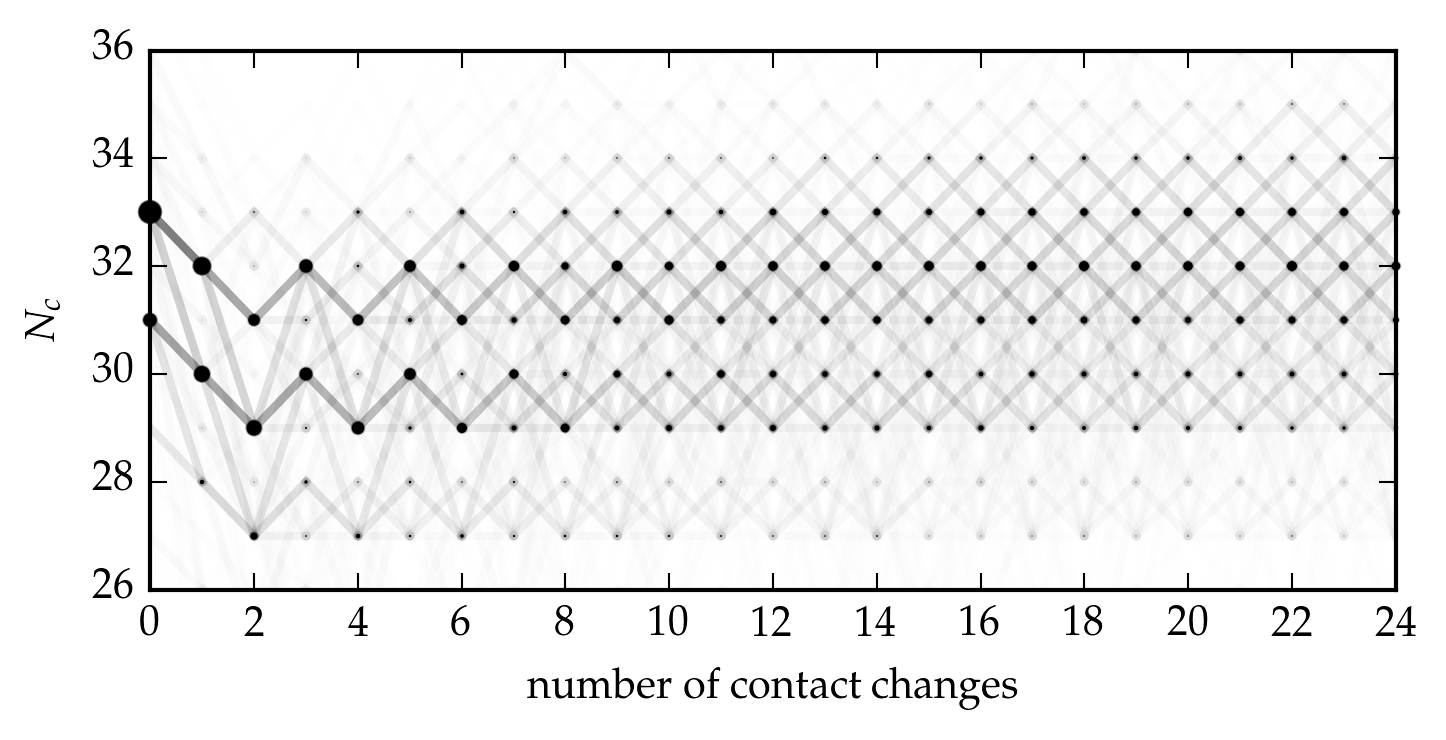

In [21]:
# elementen: gamma, Nconts, Nratt, Press

# Op de X-as staat: #CC
# Op de Y-as staat: #contacten - (2*#non-ratter particles)

# Symbol size schaalt met P(#conts - ...)
# Line width schaalt met P(transition)
alld = N16alld
f = fullfig()


Nconts = alld[:,:,1]
Nratt = alld[:,:,2]
Nparts = 16 - Nratt

Yval = Nconts #- 2*Nparts[:,0][:,np.newaxis]

#binedges = np.array([-33] + range(-6,10))+0.5; axis((-1,5,-4,4))
binedges = np.arange(0, 4*16) - 0.5; 

bincenters = 0.5*(binedges[:-1] + binedges[1:])
bincenters[0] = -7.5

#yticks([-7.5,-4,-2,0,2,4,6], ["-4", "-2", "0", "2", "4", "6"])
#yticks([-4,-2,0,2,4])
# en nu plotten we de overgangskansen
scalefact = 3
for Ncc in range(24):
    # we plotten de overgang van Ncc naar Ncc+1
    numels = sum(isfinite(Yval[:,Ncc]) * isfinite(Yval[:,Ncc+1]))
    for source in bincenters:
        if source != -7.5:
            smask = (Yval[:,Ncc] == source)
        else:
            smask = (Yval[:,Ncc] < -5)
        for target in bincenters:
            if target != -7.5:
                tmask = (Yval[:,Ncc+1] == target)
            else:
                tmask = (Yval[:,Ncc+1] < -5)
            
            value = sum(smask * tmask)
            
            if value > 0:
                color = [0,0,0,(value/numels)**.8]
                plot([Ncc,Ncc+1], [source,target], color=color, lw=2) #, linewidth=(value/numels)*scalefact)

                
# en nu plotten we een grid van probabilities
# NB. size = oppervlakte
scalefact = 10

miny = 26
maxy = 36
minx = 0
maxx = 24

for Ncc in range(25):
    Yv = Yval[:,Ncc]
    Yv = Yv[np.isfinite(Yv)]
    counts, binedges = histogram(Yv, bins=binedges)
    numels = sum(isfinite(Yval[:,Ncc]))
    
    for center, value in zip(bincenters, counts):
        if value > 0:
            if center < -30:
              print center, value

            color = [0,0,0,(value/numels)]
            if (minx <= Ncc <= maxx) and (miny <= center <= maxy):
                plot(Ncc, center, marker="o", ms=(value/numels)*scalefact, mec=color, color="k", clip_on=False) #[1-(value/numels)]*3)

            
xlabel(r"\textrm{number of contact changes}")
ylabel(r"\textrm{number of contacts}")
xticks(range(0,25,2))

#text(0.02, 0.98, r'\sf(c)', transform = gca().transAxes, verticalalignment='top', horizontalalignment='left')
axis((minx,maxx,miny,maxy))
savefig("F4b-nExcCont-N16-P1e-6.pdf")

ylabel(r"$N_c$")
savefig("F4b-nExcCont-N16-P1e-6-pre.pdf")